In [1]:
# Pandas library for the pandas dataframes
import pandas as pd    
import numpy as np

# Import Scikit-Learn library for the classification models
import sklearn
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Import cleaning and splitting functions
from clean_split_data import clean_data
from clean_split_data import split_data

### Data

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)
print(X_train)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

### Classifier

In [4]:
classifier = SVC(kernel='linear', C=10000)
classifier.fit(X_train, y_train)

SVC(C=10000, kernel='linear')

### SVM Linear Prediction

In [5]:
def predict(test_data):
    
    #test_data = pd.DataFrame(test_data).T
    y_pred = classifier.predict(test_data)
   
    return y_pred

In [6]:
y_pred=predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [7]:
y_pred1 = classifier.predict(X_test)

In [8]:
''' Accuracy and MSE using all 10 features'''

accuracy_1 = accuracy_score(y_test, y_pred)
print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
#print('R-Squared Score',r2_score(y_test,y_pred))
print("Accuracy score", accuracy_score(y_test, y_pred))

Prediction accuracy MSE:  0.043859649122807015
Accuracy score 0.956140350877193


### Backward Stepwise selection Using 1 to 9 features 

In [9]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y = data.diagnosis


In [10]:
n = [1,2,3,4,5,6,7,8,9]

list_MSE=[]
list_R2=[]
list_AC=[]
list_MSE_1=[]
list_R2_1=[]
list_AC_1=[]

for i in n:
    sbs_backward = SequentialFeatureSelector(SVC(kernel = "linear"), 
                                        n_features_to_select=i,
                                        direction='backward').fit(X, y)
    selected = sbs_backward.get_support(indices=True)
    f_names = np.array(X.columns)
    x_manip = X[f_names[selected]]
    #print("Selected input features using backward Stepwise Selection", f_names[selected])
    #print(x_manip)
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(x_manip, y, test_size=0.2, random_state=42) 
    model = SVC(kernel='linear', C=10000)
    model.fit(X_train1, y_train1)

    y_pred1 = model.predict(X_test1)
    y_pred2 = model.predict(X_train1)
    
    #print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
    #print('R-Squared Score',r2_score(y_test1,y_pred1))
    #print("Accuracy score", accuracy_score(y_test1, y_pred1))
    
    list_MSE.append(mean_squared_error(y_test1, y_pred1))
    #list_R2.append(r2_score(y_test1, y_pred1))
    list_AC.append(accuracy_score(y_test1, y_pred1))
    #print('MSE:', list_MSE)
    #print('R2:', list_R2)
    #print('AC:', list_AC)
    
    list_MSE_1.append(mean_squared_error(y_train1, y_pred2))
    #list_R2_1.append(r2_score(y_train1, y_pred2))
    list_AC_1.append(accuracy_score(y_train1, y_pred2))

<function matplotlib.pyplot.show(close=None, block=None)>

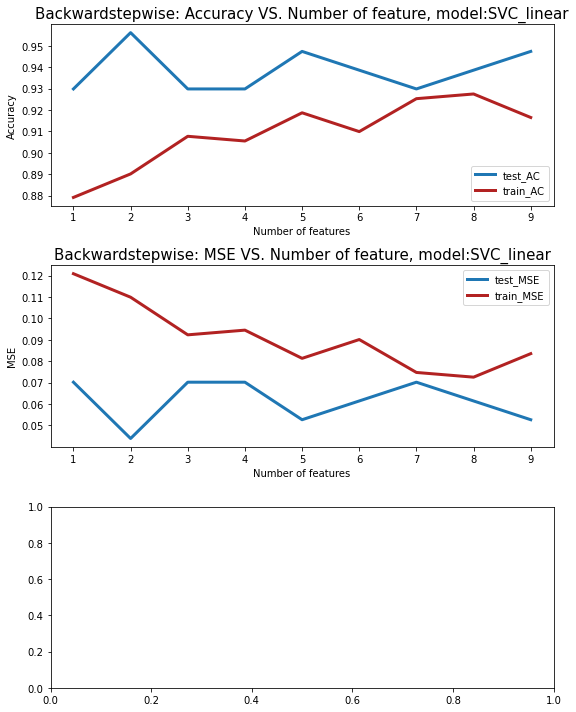

In [11]:
fig,ax = plt.subplots(3,1,figsize=(8,10))
#ax[0].plot(n, list_R2, linewidth=3, alpha=1,label='test_R2')
#ax[0].plot(n, list_R2_1, linewidth=3, alpha=1,c='FireBrick',label='train_R2')
#ax[0].set_title('Backwardstepwise: R2 VS. Number of feature, model:SVC_rbf', fontsize=15)
#ax[0].set_xlabel('Number of features')
#ax[0].set_ylabel('R2')
#ax[0].legend()

ax[0].plot(n, list_AC, linewidth=3 ,alpha=1,label='test_AC')
ax[0].plot(n, list_AC_1, linewidth=3, alpha=1,c='FireBrick',label='train_AC')
ax[0].set_title('Backwardstepwise: Accuracy VS. Number of feature, model:SVC_linear', fontsize=15)
ax[0].set_xlabel('Number of features')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(n, list_MSE, linewidth=3 ,alpha=1,label='test_MSE')
ax[1].plot(n, list_MSE_1, linewidth=3, alpha=1,c='FireBrick',label='train_MSE')
ax[1].set_title('Backwardstepwise: MSE VS. Number of feature, model:SVC_linear', fontsize=15)
ax[1].set_xlabel('Number of features')
ax[1].set_ylabel('MSE')
ax[1].legend()

plt.tight_layout()
plt.show

### Resudual Plot

NameError: name 'accuracy_2' is not defined

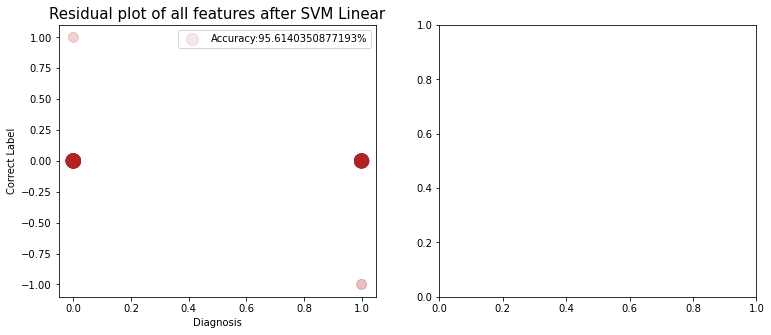

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12.5,5))
ax[0].scatter(y_test, y_pred - y_test,s=(200-(100*abs(y_pred-y_test))),alpha=0.1,c= 'FireBrick',label = "Accuracy:"+str(accuracy_1*100)+"%")
ax[0].set_title('Residual plot of all features after SVM Linear', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test1, y_pred - y_test,s=(200-(100*abs(y_pred1-y_test1))), alpha=0.1,c= 'DarkCyan',label = "Accuracy:"+str(accuracy_2*100)+"%")
ax[1].set_title('Residual plot after Stepwise Selection after SVM Linear', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()

### Sample Train, Test, Split results

In [ ]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [ ]:
def sample_results():
    ''' 
    Returns the results and confusion matrix of the sample dataset from Breast Cancer Wisconsin Dataset.
    '''
    y_pred = classifier.predict(X_test)
    print("Prediction accuracy MSE: ", mean_squared_error(y_test, y_pred))
    print("Mean accuracy on test set", classifier.score(X_test, y_test))
    print("The confusion matrix for the sample dataset using a decision tree is displayed below: ")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(classifier, X_test, y_test)
    plt.show()
    
    return

In [ ]:
'''This matrix is only for Non-stepwise SVM only'''
sample_results()

In [ ]:
'''This matrix is for Stepwise SVM'''
plot_confusion_matrix(model, X_test1, y_test1)
plt.show()
print("Prediction accuracy MSE: ", mean_squared_error(y_test1, y_pred1))
